In [26]:
import pandas as pd, numpy, scipy, matplotlib.pyplot as plt, seaborn as sns

nacitanie dat do dafatfamov

In [45]:
df_product = pd.read_csv("product.csv", sep='\t')
df_session = pd.read_csv("session.csv", sep='\t')
df_users = pd.read_csv("user.csv", sep='\t')
print(len(df_product), len(df_session), len(df_users))
# df_product.head()
# df_session.head()
# df_users.head()
df_session


14908 11039 2592


,session_id,session_duration,pct_mouse_click,pct_mouse_move,pct_scrandom,browser_name,pct_scroll_move,wild_mouse_duration,total_load_time,screen_width,...,ack,pct_wild_mouse,pct_doubleclick,pct_input,mouse_move_total_rel_distance,page_activity_duration,user_id,pct_click,session_start,screen_height
0,29352,46.20666,8.66407,8.38688,39.96280,chrome,50.61083,10.41166,3.60459,1920,...,0.0,54.43209,12.49105,4.47198,13.77493,13.45456,1210,7.31828,2023-07-24 21:57:03,600
1,769698,205.16791,12.02141,12.17055,60.01076,edge,42.49860,10.15309,7.06828,1366,...,0.0,51.23958,7.87225,3.51481,8.68947,7.07715,1050,8.37471,2019-09-14 02:15:38,1080
2,284853,234.67891,12.16289,9.58028,54.80463,chrome,48.92000,8.80681,6.13853,1920,...,1.0,39.34868,8.47885,0.93258,7.47787,3.55613,1026,10.49107,2022-02-18 18:49:38,1080
3,1427567,144.28902,12.06736,7.21877,45.49934,edge,49.84135,8.68074,1.86351,1920,...,0.0,35.79768,13.23949,0.76370,10.49697,9.16388,956,11.41349,2023-04-30 17:18:55,600
4,465974,108.38966,11.99156,10.16503,51.33054,chrome,55.75590,9.39695,1.86608,1920,...,0.0,44.74054,11.58722,1.67888,8.31823,9.48939,933,10.83115,2022-01-05 10:29:17,lower
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11034,932425,159.66864,11.95720,12.40163,29.80343,opera,54.58413,10.33889,7.31696,1366,...,1.0,48.63297,7.37053,4.11710,8.60510,8.28009,896,8.01530,2020-10-05 09:05:46,higher
11035,978422,39.83148,5.34172,2.62107,58.35084,other,69.14506,10.38615,4.44113,1024,...,1.0,57.74391,14.22492,4.38136,11.83268,6.09414,247,11.50074,2020-05-12 19:46:24,800
11036,420213,88.51734,7.37956,4.40572,36.13766,chrome,24.40196,10.20908,3.90621,1920,...,1.0,56.14606,11.37564,3.67240,13.57094,11.65986,2371,14.30920,2018-10-05 10:53:30,1024
11037,207629,183.29016,10.75805,10.47122,64.75961,other,45.14381,11.17955,5.33379,1366,...,0.0,55.69028,13.96798,9.60474,14.08702,14.31638,825,7.92208,2020-05-29 18:15:28,higher


pocet zaznamov v kazdom subore

In [4]:
print(f'pocet pozretych produktov: {len(df_product)}\npocet uzivatelskych sedeni: {len(df_session)}\npocet pouzivatelov: {len(df_users)}')

pocet pozretych produktov: 14908
pocet uzivatelskych sedeni: 11039
pocet pouzivatelov: 2592


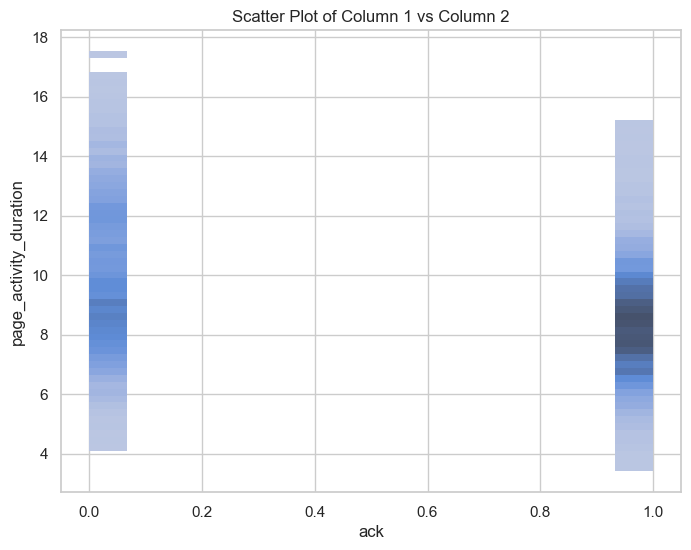

' new_pivot = pd.pivot_table(df_session, values=["total_load_time", "pct_rage_click"]) '

In [35]:
df_product.describe()
df_session
sns.set(style='whitegrid')  # Optional: Set the style
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
sns.histplot(x='ack', y="page_activity_duration", data=df_session)
plt.xlabel('ack')
plt.ylabel('page_activity_duration')
plt.title('Scatter Plot of Column 1 vs Column 2')
plt.show()
""" new_pivot = pd.pivot_table(df_session, values=["total_load_time", "pct_rage_click"]) """
